# Fundamentos de imágenes digitales en el espacio RGB en Python: *Read, Display, Save*.

<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### Este notebook tiene como objetivo mostrar los fundamentos básicos de las imágenes en Python.

# Brevísima introducción:

### Una imagen puede ser definida como una función de dos dimensiones $f(x,y)$, en donde el conjunto de pares $\{(x,y)\}$ son coordenadas espaciales. En este notebook (por ser introductorio), podríamos considerar que el mapeo para $f$ es del tipo: $f:\mathbb{R}^2 \rightarrow  \mathbb{R}$ (aunque especificaremos más el mapeo de $f$ en los notebooks siguientes).

### Para un par arbitrario $(x_0 , y_0)$, a la amplitud $f(x_0 , y_0)$ se le llama la intensidad de la imagen en ese punto. Si tanto el conjunto de pares $\{(x,y)\}$ como la amplitud son cantidades finitas y discretas, al tipo de imagen se le llama digital. Al mostrar una imagen digital, 

### Las imágenes digitales pueden estar caracterizadas por un espacio unidimensional llamado *escala de grises*, donde al mostrar la imagen, esta va a tener componentes finitos llamados pixeles. Cada pixel es una muestra que representa la intensidad , es decir, un pixel es información sobre la intensidad percibida en la imagen digital en un punto $(x,y)$.

### Una imagen digital en escala de grises está representada mediante una matriz de $M \times N$ con valores discretos de pixeles:

<font size="5"> $I(x,y) = \begin{pmatrix}
f(0,0) & f(0,1) & \cdots & f(0,N) \\
f(1,0) & f(1,1) & \cdots & f(1,N) \\
\vdots & \vdots & \ddots & \vdots \\
f(M,0) & f(M,1) & \cdots & f(M,N)
\end{pmatrix}$ </font>

### La máxima intensidad en la escala de grises está representada por el pixel de valor 255 (que corresponde al color *puramente* blanco), mientras que la intensidad mínima está representada por el pixel de valor 0 (que corresponde al color *puramente* negro). O bien, esta escala puede verse de una forma binaria: adquiere el valor mínimo, 0 (0%), cuando se percibe color negro, y 1 (100%) cuando se percibe una intensidad máxima (color blanco). 

### Por otro lado, podemos tener una imagen representada en un espacio tridimensional de color llamado *RGB*, el cual está formado por las componentes de color rojo, verde y azul, cuyos valores van a ir desde 0 hasta 255 (que es la máxima intensidad). Podemos plantear la siguiente analogía con el álgebra lineal:

### El espacio $\mathbb{R}^3$ es generado por los vectores $\{\hat{e}_1=(1,0,0),\hat{e}_2=(0,1,0),\hat{e}_3=(0,0,1)\}$, pues estos son sus vectores base estándar (conocidos como vectores canónicos), por lo que un vector $\vec{x}\in \mathbb{R}^3 $ va a estar representado en términos de la base como $\vec{x}=(x_1,x_2,x_3)=x_1\hat{e}_1 +x_2\hat{e}_2 +x_3\hat{e}_3$.

### Análogamente, el espacio RGB es un espacio vectorial cuya base tiene tres componentes que lo generan: un vector R (red), un vector G (green) y un vector B (blue), por lo que un vector dentro de este espacio vectorial va a estar representado por tres entradas con relación a la base. En este caso, al hablar de imágenes, tenemos que una imagen representada en el espacio RGB va a tener una matriz por cada componente de la base: una matriz con valores de intensidad asociados a la componente R, una asociada a la componente G y una a B.

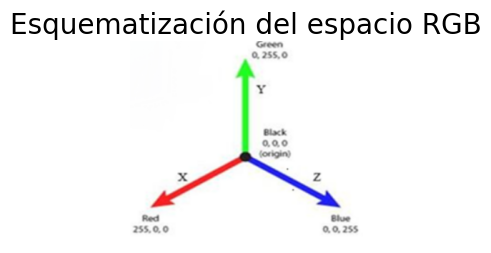

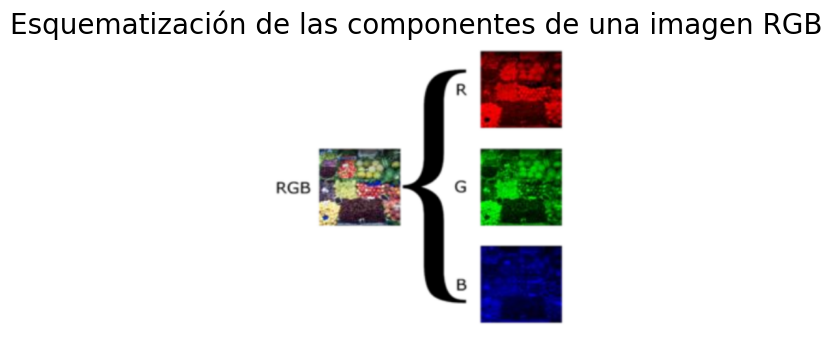

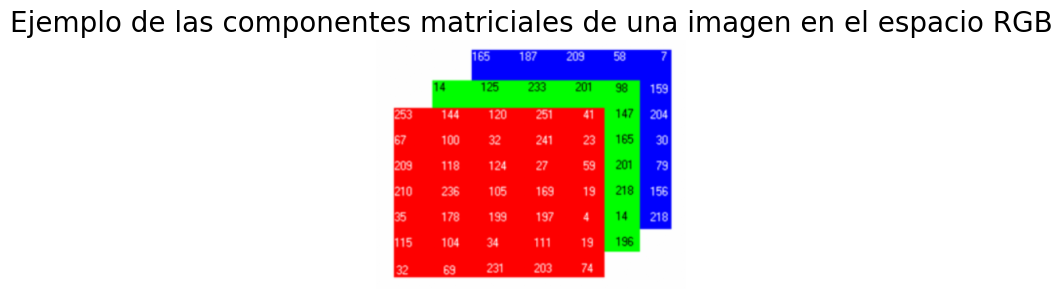

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

esq1=mpimg.imread('espacioRGB.png')
plt.figure(figsize=(3, 8))
plt.imshow(esq1)
plt.axis('off') 
plt.title('Esquematización del espacio RGB', fontsize=20)
plt.show()

esq2=mpimg.imread('descomposición_RGB.png')
plt.figure(figsize=(4, 8))
plt.imshow(esq2)
plt.axis('off') 
plt.title('Esquematización de las componentes de una imagen RGB', fontsize=20)
plt.show()

esq3=mpimg.imread('componentesRGB.png')
plt.figure(figsize=(4, 8))
plt.imshow(esq3)
plt.axis('off') 
plt.title('Ejemplo de las componentes matriciales de una imagen en el espacio RGB', fontsize=20)
plt.show()

# Ejercicio:

### Leer, mostrar y guardar una imagen tipo RGB en Python, utilizando las bibliotecas Matplotlib y NumPy (aunque los dos primeros procesos ya fueron ligeramente *spoileados* en los esquemas de la introducción).

### Posteriormente, mostrar una imagen en escala de grises de la misma manera.

# $\blacksquare$ RGB:

# Proceso de lectura de imágenes RGB:

### Usaremos la función *plt.imread()*, la cual lee una imagen, es decir, devuelve un arreglo tridimensional NumPy asociado a la imagen. Como hablamos de imágenes RGB, el arreglo va a ser una matriz cuyas entradas son pixeles, y cada pixel tiene tres valores, uno por cada componente de color (rojo, verde y azul). 

### Podemos ver esto como las tres matrices que se esquematizaban en la introducción.


In [2]:
imagen1=plt.imread('Verduras.jpg') #Nótese que no es lo mismo leer una imagen que mostrarla

print(f"El tipo de arreglo que devuelve la función plt.imread aplicada sobre la imagen es:\n {type(imagen1)}")
print("")

print(f"El arreglo asociado a la imagen es:\n {imagen1}")
print("")

print(f"El orden del arreglo es:\n {imagen1.shape}")
print("")

print(f"La dimensión del arreglo NumPy es:\n {imagen1.ndim}")
print(" ")

print(f"El tamaño del arreglo (o el número total de componentes) es:\n 225 x 225 x 3 = {imagen1.size}")
print("")

print(f"Tipo de dato que arroja la función plt.imread:\n {imagen1.dtype}") #Unsigned 8-bit Integer: Tipo de dato que almacena valores enteros entre 0 y 255.


El tipo de arreglo que devuelve la función plt.imread aplicada sobre la imagen es:
 <class 'numpy.ndarray'>

El arreglo asociado a la imagen es:
 [[[139  29  76]
  [164  57 101]
  [162  55  99]
  ...
  [174 135 138]
  [172 133 136]
  [150 130 139]]

 [[162  68  14]
  [188  95  38]
  [183  90  31]
  ...
  [155 204  78]
  [153 202  76]
  [132 200  77]]

 [[167  69  34]
  [193  93  57]
  [188  89  50]
  ...
  [153 203  88]
  [151 201  86]
  [129 199  87]]

 ...

 [[117  93  23]
  [117 124  44]
  [104 118  33]
  ...
  [209 201 178]
  [163 220 179]
  [182 209 168]]

 [[ 99  85  12]
  [133 144  65]
  [110 115  35]
  ...
  [223 207 192]
  [162 205 177]
  [181 211 161]]

 [[114  71  29]
  [137 138  58]
  [118 108  55]
  ...
  [178 218 165]
  [177 204 171]
  [185 195 160]]]

El orden del arreglo es:
 (225, 225, 3)

La dimensión del arreglo NumPy es:
 3
 
El tamaño del arreglo (o el número total de componentes) es:
 225 x 225 x 3 = 151875

Tipo de dato que arroja la función plt.imread:
 uint8


# Proceso de display de imágenes RGB (Mostrar una imagen):

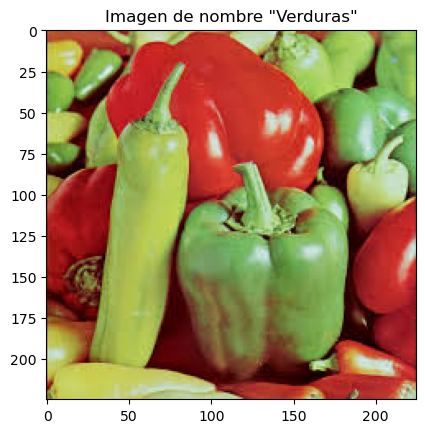

In [3]:
plt.imshow(imagen1)      
plt.title('Imagen de nombre "Verduras"')
plt.show()

# Proceso save (Guardar una imagen):

### Para guardar imágenes procesadas en Python podemos usar la función *plt.imsave*. La guarda en el directorio donde se encuentra el notebook:

In [4]:
plt.imsave('Imagen_Chida_en_Python.png', imagen1)

# $\blacksquare$  Escala de grises:

### Vamos a leer y a mostrar una imagen en escala de grises de manera análoga a la RGB con *plt.imread*.

# Proceso de lectura y display para la imagen en escala de grises:

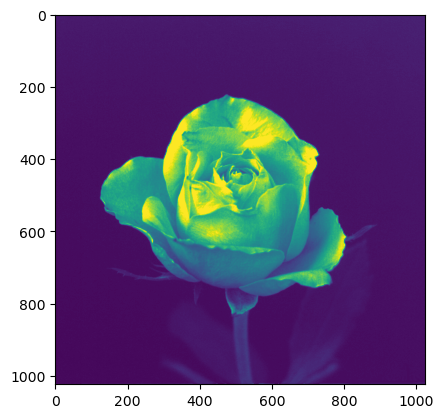

In [5]:
imagen2=plt.imread('Flor.jpg')
plt.imshow(imagen2)

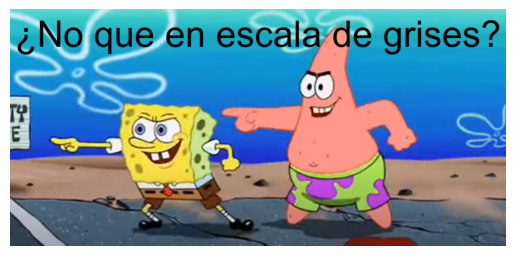

In [13]:
from PIL import Image, ImageDraw, ImageFont
bob = Image.open('bob.png')
draw = ImageDraw.Draw(bob)
font = ImageFont.truetype("arial.ttf", 75)  
text = "¿No que en escala de grises?"
position = (10, 10)  
draw.text(position, text, font=font, fill="black")
plt.imshow(bob)
plt.axis('off')  
plt.show()

### ¿Por qué *plt.imsave* no mostró la imagen en escala de grises (juro que la imagen original sí está en escala de grises)?

### Lo que pasó fue que de alguna manera, esta función de Matplotlib aplicó una transformación que mapeó los valores en un espacio unidimensional de escala de grises al espacio tridimensional RGB. Asignó componentes aleatorias RGB a cada componente en la escala de grises y mostró la imagen con esa combinación.

### Para mostrar la imagen original (en escala de grises) extendemos el comando como sigue:

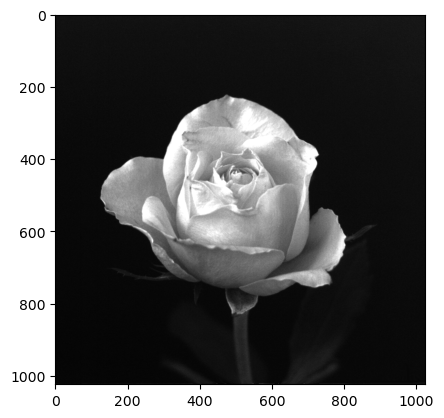

El tipo de arreglo que devuelve la función plt.imread aplicada sobre la imagen es:
 <class 'numpy.ndarray'>

El arreglo asociado a la imagen es:
 [[21 16 15 ... 23 23 23]
 [21 19 17 ... 23 23 24]
 [17 17 20 ... 24 23 23]
 ...
 [ 7  7  7 ... 21 21 21]
 [10 10  9 ... 17 17 17]
 [11 10 10 ... 15 15 15]]

El orden del arreglo es:
 (1024, 1024)

La dimensión del arreglo NumPy es:
 2
 
El tamaño del arreglo (o el número total de componentes) es:
 1024 x 1024 = 1048576

Tipo de dato que arroja la función plt.imread:
 uint8


In [17]:
plt.imshow(imagen2,cmap="gray")
plt.show()

print(f"El tipo de arreglo que devuelve la función plt.imread aplicada sobre la imagen es:\n {type(imagen2)}")
print("")

print(f"El arreglo asociado a la imagen es:\n {imagen2}")
print("")

print(f"El orden del arreglo es:\n {imagen2.shape}")
print("")

print(f"La dimensión del arreglo NumPy es:\n {imagen2.ndim}")
print(" ")

print(f"El tamaño del arreglo (o el número total de componentes) es:\n 1024 x 1024 = {imagen2.size}")
print("")

print(f"Tipo de dato que arroja la función plt.imread:\n {imagen2.dtype}") 

# Fin del ejercicio.

# Bibliografía recomendada:

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.

### $\blacksquare$ Galperin, Y. V. (2021). An image processing tour of college mathematics (1st ed.). Chapman & Hall/CRC Mathematical and Computational Imaging Sciences Series.